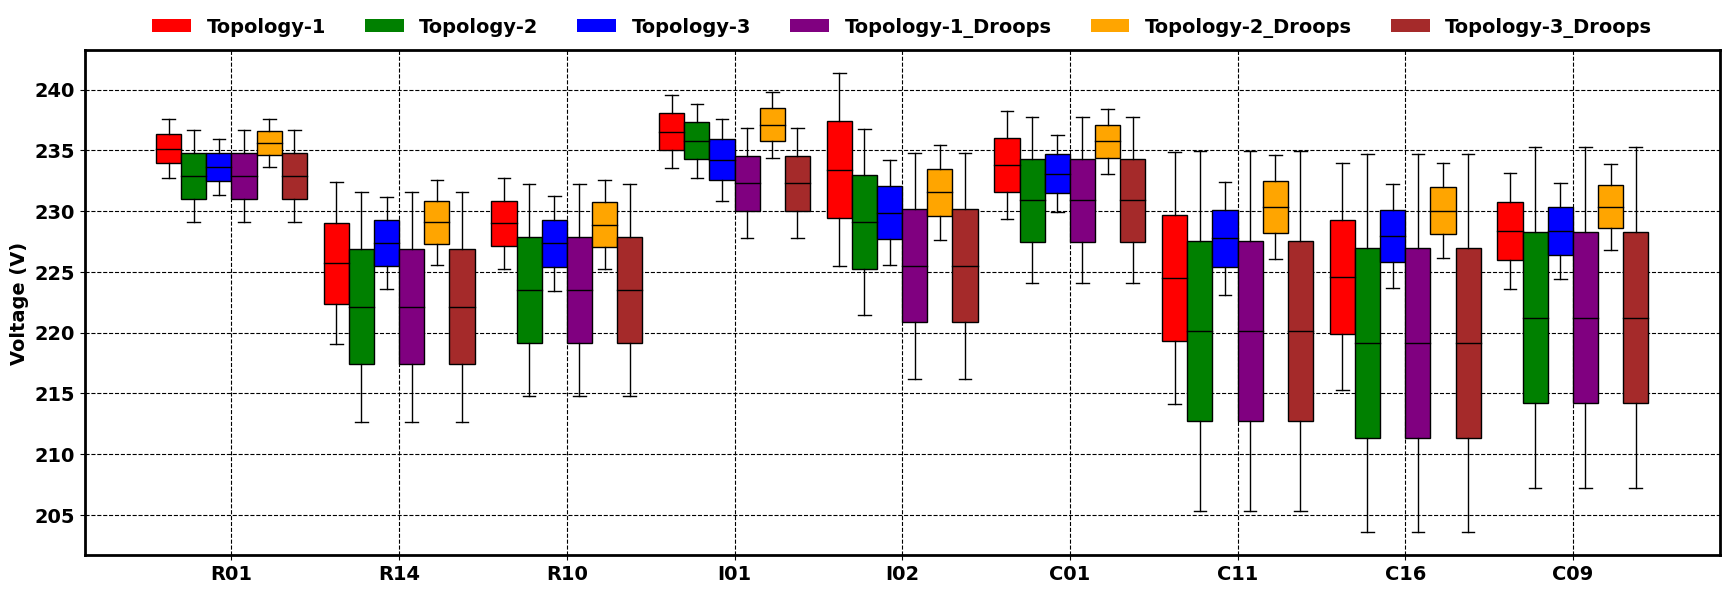

In [6]:
# Voltage in box plot ## buses VSC linked only - With amd Without Droop in case-3 at Topology-1, 2 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R01', 'R14', 'R10', 'I01', 'I02', 'C01', 'C11','C16', 'C09']

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

topology_data = {}
for topology, filename in topology_files.items():
    topology_data[topology] = {
        'with_droop': read_voltage_data(filename, selected_buses, droop=True),
        'without_droop': read_voltage_data(filename, selected_buses, droop=False)
    }


# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, data in topology_data.items():
        if data['with_droop'] is not None:
            max_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_with, max_v_with])
        if data['without_droop'] is not None:
            max_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_without, max_v_without])


fig, ax = plt.subplots(figsize=(18, 6))
positions = np.arange(len(bus_data))
width = 0.15

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=color)
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color)
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j % len(topology_colors)])

ax.set_xticks(positions + width * (len(topology_voltages) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_voltages), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

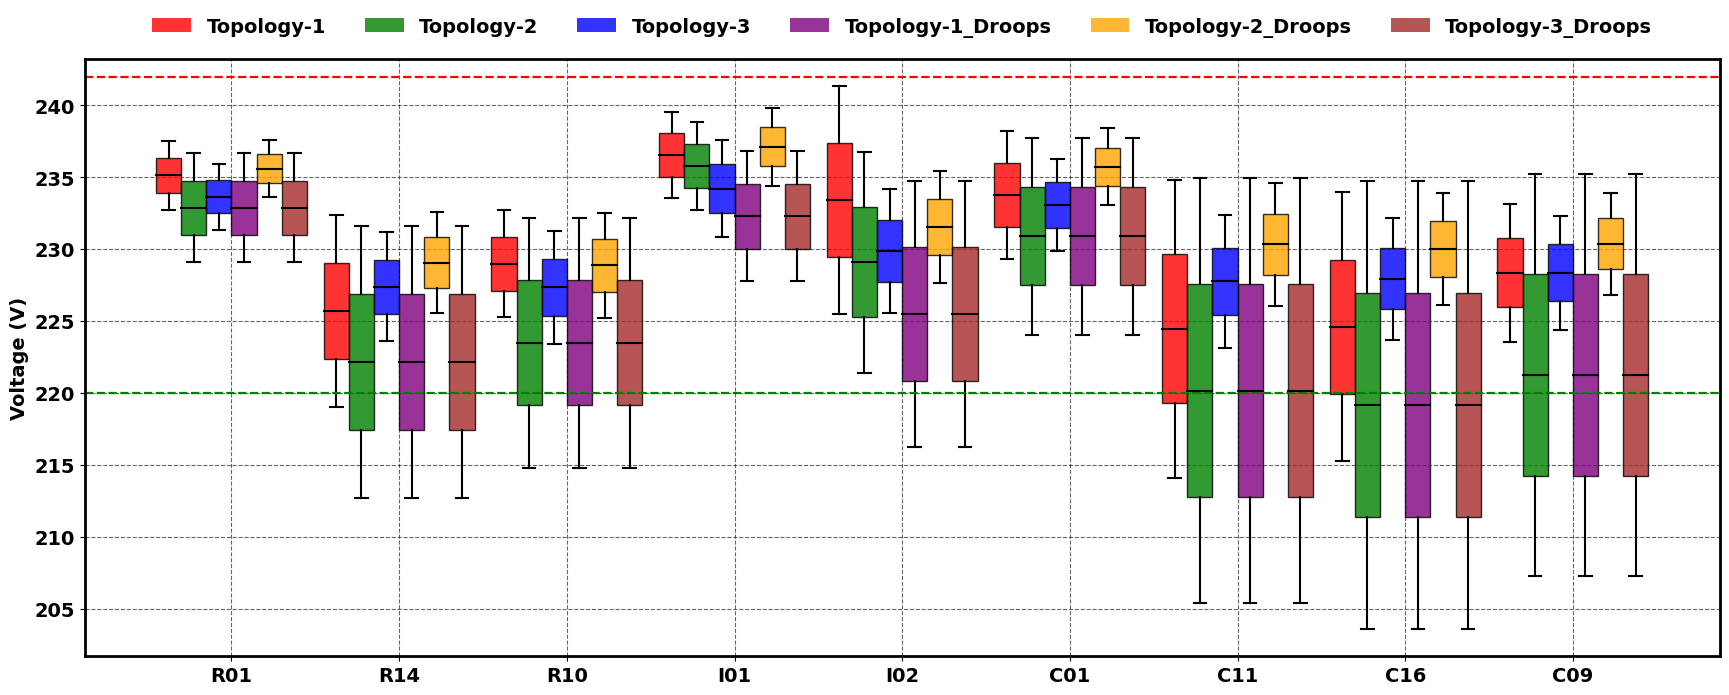

In [4]:
#### New Plot
# Voltage in box plot ## buses VSC linked only - With amd Without Droop in case-3 at Topology-1, 2 and 3 

####### New plot
# Voltage in box plot ## buses not linked to VSC - With amd Without Droop in case-3 at Topology-1, 2 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R01', 'R14', 'R10', 'I01', 'I02', 'C01', 'C11','C16', 'C09']

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

topology_data = {}
for topology, filename in topology_files.items():
    topology_data[topology] = {
        'with_droop': read_voltage_data(filename, selected_buses, droop=True),
        'without_droop': read_voltage_data(filename, selected_buses, droop=False)
    }


# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, data in topology_data.items():
        if data['with_droop'] is not None:
            max_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_with, max_v_with])
        if data['without_droop'] is not None:
            max_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_without, max_v_without])


fig, ax = plt.subplots(figsize=(18, 7))
positions = np.arange(len(bus_data))
width = 0.15

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)
        plt.setp(box['fliers'], markeredgecolor='black', markeredgewidth=1.5, markersize=8)

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j % len(topology_colors)])

ax.set_xticks(positions + width * (len(topology_voltages) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_voltages), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Add the horizontal line of the Max/Min voltage  242/220
ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6) ## Max limit volttage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6) ## Min limit volttage

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()

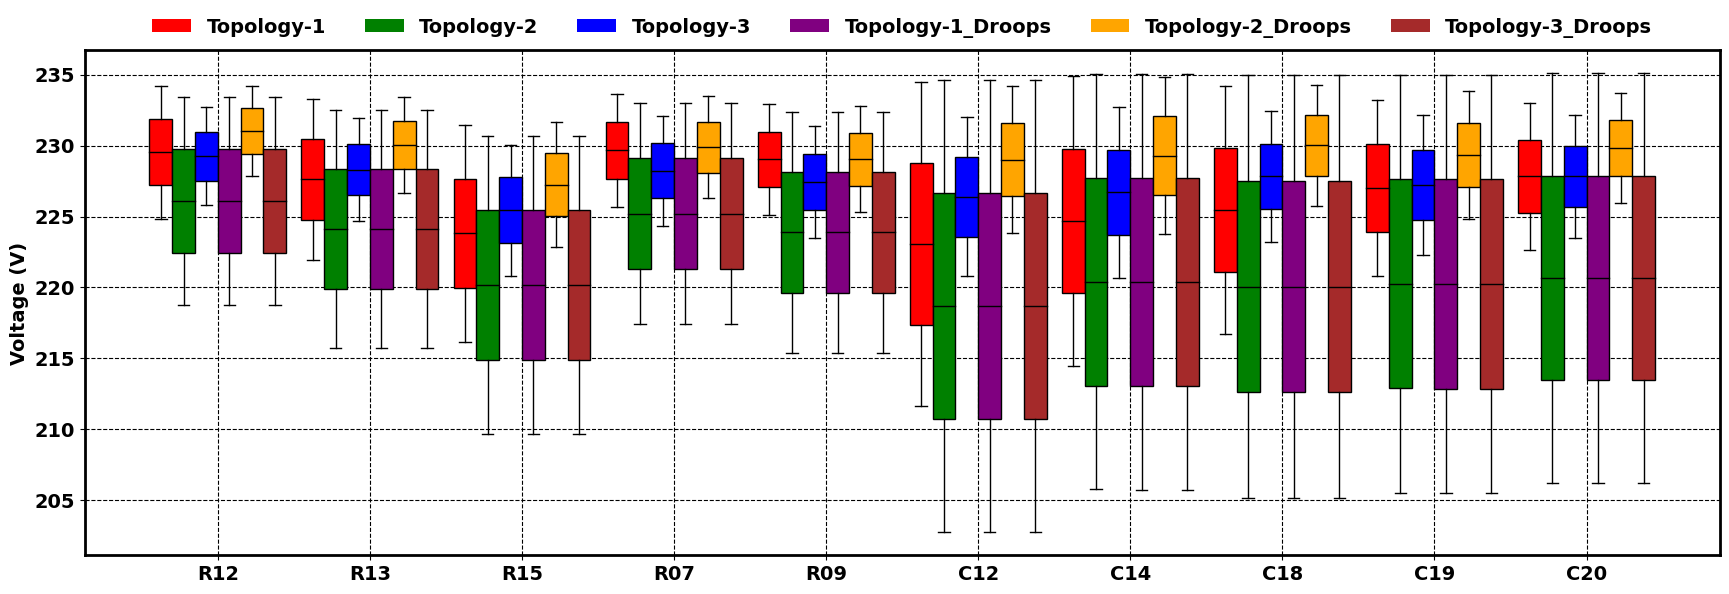

In [5]:
# Voltage in box plot ## buses not linked to VSC - With amd Without Droop in case-3 at Topology-1, 2 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

topology_data = {}
for topology, filename in topology_files.items():
    topology_data[topology] = {
        'with_droop': read_voltage_data(filename, selected_buses, droop=True),
        'without_droop': read_voltage_data(filename, selected_buses, droop=False)
    }


# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, data in topology_data.items():
        if data['with_droop'] is not None:
            max_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_with, max_v_with])
        if data['without_droop'] is not None:
            max_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_without, max_v_without])


fig, ax = plt.subplots(figsize=(18, 6))
positions = np.arange(len(bus_data))
width = 0.15

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=color)
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color)
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j % len(topology_colors)])

ax.set_xticks(positions + width * (len(topology_voltages) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_voltages), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

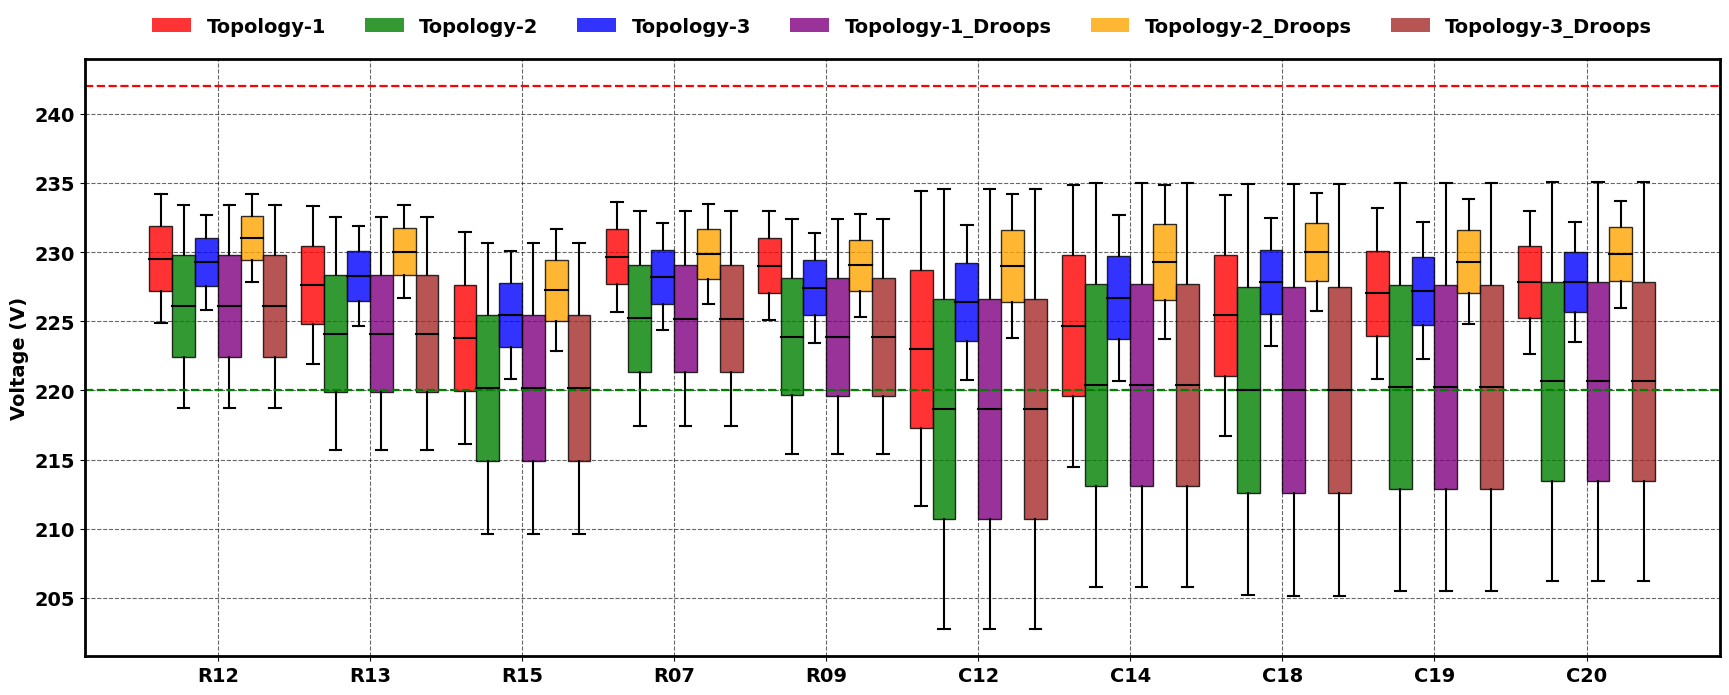

In [3]:
####### New plot
# Voltage in box plot ## buses not linked to VSC - With amd Without Droop in case-3 at Topology-1, 2 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R12', 'R13', 'R15', 'R07', 'R09', 'C12', 'C14', 'C18', 'C19', 'C20']

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

topology_data = {}
for topology, filename in topology_files.items():
    topology_data[topology] = {
        'with_droop': read_voltage_data(filename, selected_buses, droop=True),
        'without_droop': read_voltage_data(filename, selected_buses, droop=False)
    }


# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, data in topology_data.items():
        if data['with_droop'] is not None:
            max_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_with, max_v_with])
        if data['without_droop'] is not None:
            max_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_without, max_v_without])


fig, ax = plt.subplots(figsize=(18, 7))
positions = np.arange(len(bus_data))
width = 0.15

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
        plt.setp(box['medians'], color='black', linewidth=1.5)
        plt.setp(box['caps'], color='black', linewidth=1.5)
        plt.setp(box['whiskers'], color='black', linewidth=1.5)
        plt.setp(box['fliers'], markeredgecolor='black', markeredgewidth=1.5, markersize=8)

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j % len(topology_colors)])

ax.set_xticks(positions + width * (len(topology_voltages) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_voltages), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Add the horizontal line of the Max/Min voltage  242/220
ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6) ## Max limit volttage
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6) ## Min limit volttage

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black', alpha=0.6)
plt.tight_layout()
plt.show()



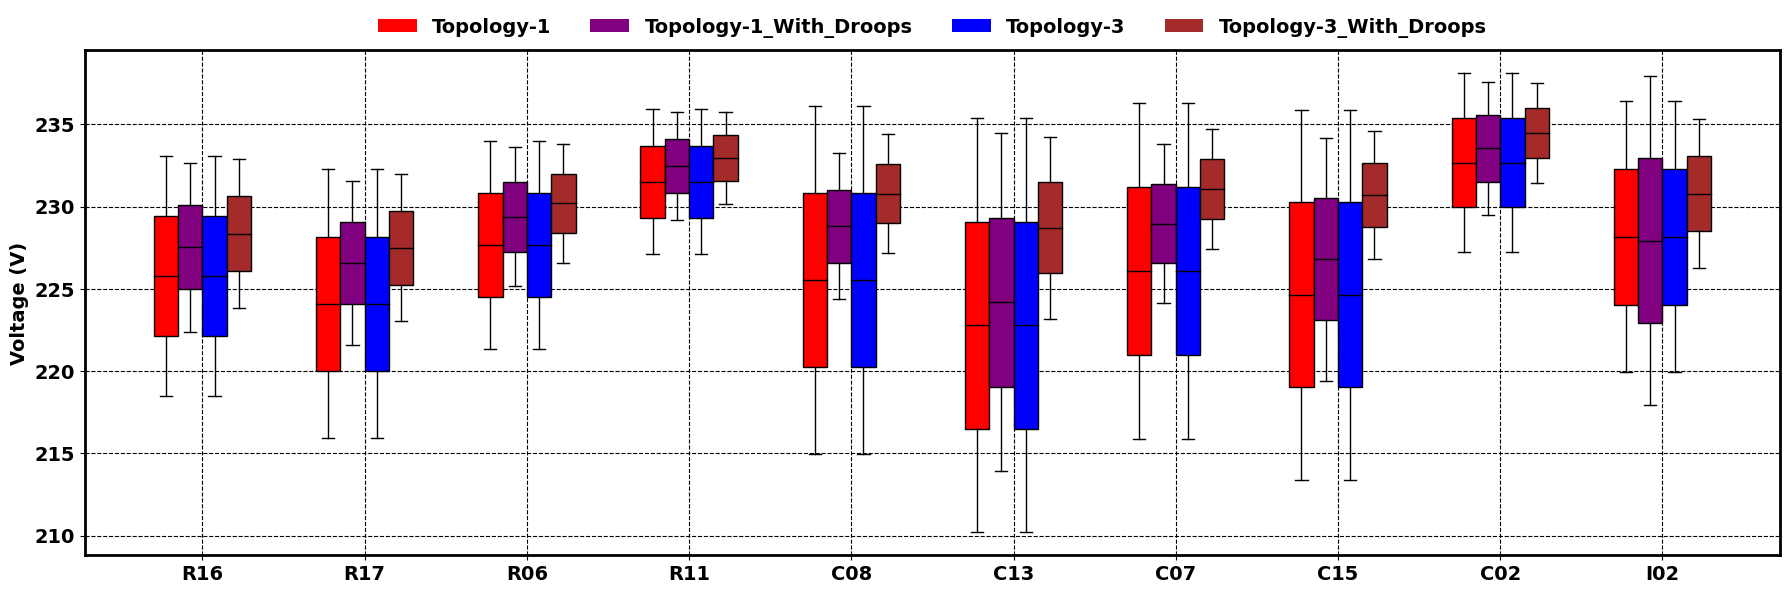

In [9]:
# Voltage in box plot With amd Without Droop in case-1 at Topology-1 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None

topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case1.csv',  # Since Changed case to 1
    'Topology-3': 'Voltage_With_Droops_Topology3_case1.csv',  # Since Changed case to 1
}

selected_buses = ['R16', 'R17','R06', 'R11', 'C08', 'C13', 'C07', 'C15', 'C02', 'I02']

topology_colors = {
    'Topology-1': 'red',
    'Topology-1_With_Droops': 'purple',
    'Topology-3': 'blue',
    'Topology-3_With_Droops': 'brown',
}

all_data = {}
for topology, filename in topology_files.items():
    # Load data with and without droops
    df_without_droop = read_voltage_data(filename, selected_buses, droop=False)
    df_with_droop = read_voltage_data(filename, selected_buses, droop=True)

    if df_without_droop is not None:
        all_data[topology] = df_without_droop
    if df_with_droop is not None:
        all_data[topology + '_With_Droops'] = df_with_droop

# --- Plotting ---
fig, ax = plt.subplots(figsize=(18, 6))
width = 0.15
positions = np.arange(len(selected_buses))

handles = []
labels = []

for i, bus in enumerate(selected_buses):
    for j, (key, df) in enumerate(all_data.items()):
        if df is not None:
            bus_data = df[df['Bus'] == bus][['Min Voltage', 'Max Voltage']].values.tolist()
            if bus_data: # Check if bus_data is not empty
                bus_data = bus_data[0] #Take the first element if it's a list of lists
                box = ax.boxplot(bus_data, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
                color = topology_colors[key]
                plt.setp(box['boxes'], color='black', facecolor=color)
                plt.setp(box['medians'], color='black', linewidth=1)
                plt.setp(box['caps'], color='black')
                plt.setp(box['whiskers'], color='black')
                plt.setp(box['fliers'], markeredgecolor='black')

                if i == 0:
                    handle = plt.Rectangle((0, 0), 1, 1, fc=color)
                    handles.append(handle)
                    labels.append(key)

ax.set_xticks(positions + width * (len(all_data) - 1) / 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(all_data), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

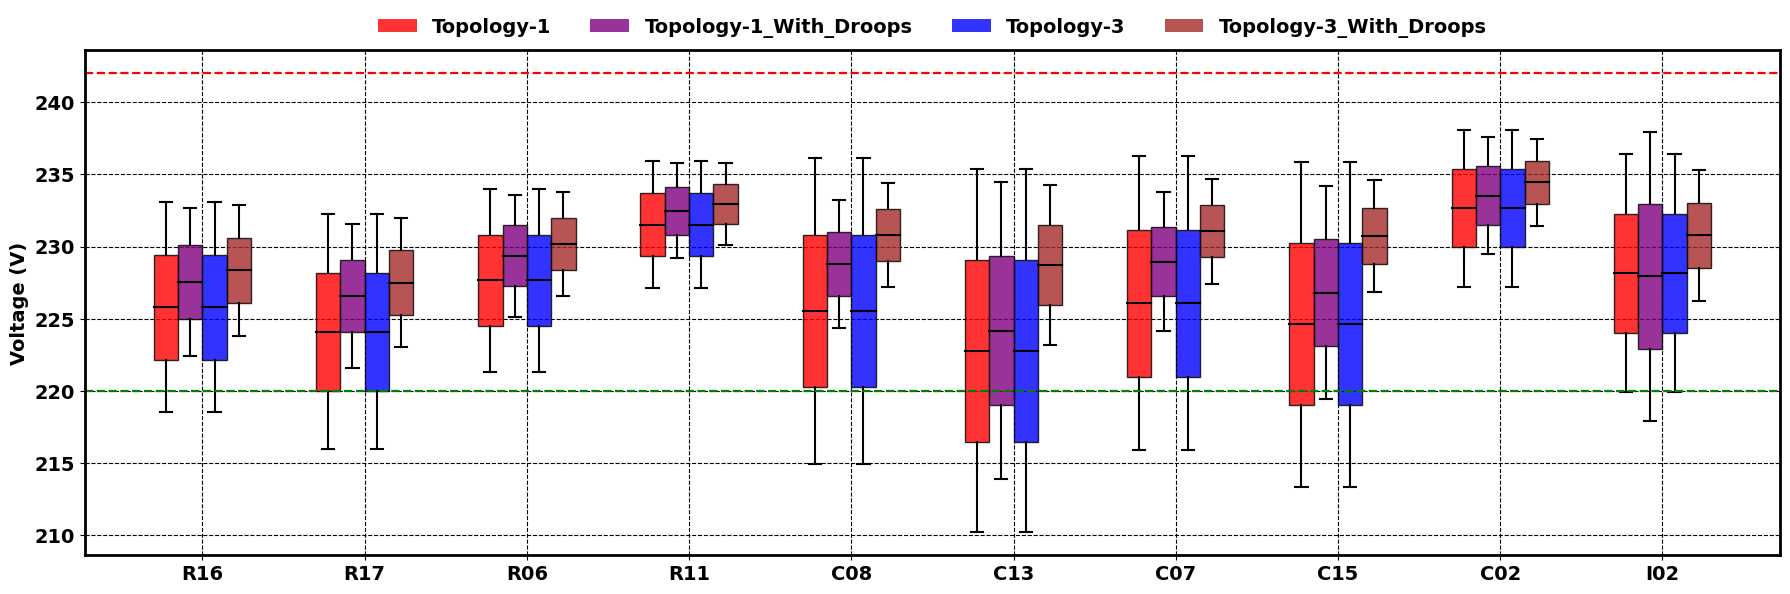

In [7]:
##### New Plot 
# Voltage in box plot With amd Without Droop in case-1 at Topology-1 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None

topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case1.csv',  # Since Changed case to 1
    'Topology-3': 'Voltage_With_Droops_Topology3_case1.csv',  # Since Changed case to 1
}

selected_buses = ['R16', 'R17','R06', 'R11', 'C08', 'C13', 'C07', 'C15', 'C02', 'I02']

topology_colors = {
    'Topology-1': 'red',
    'Topology-1_With_Droops': 'purple',
    'Topology-3': 'blue',
    'Topology-3_With_Droops': 'brown',
}

all_data = {}
for topology, filename in topology_files.items():
    # Load data with and without droops
    df_without_droop = read_voltage_data(filename, selected_buses, droop=False)
    df_with_droop = read_voltage_data(filename, selected_buses, droop=True)

    if df_without_droop is not None:
        all_data[topology] = df_without_droop
    if df_with_droop is not None:
        all_data[topology + '_With_Droops'] = df_with_droop

# --- Plotting ---
fig, ax = plt.subplots(figsize=(18, 6))
width = 0.15
positions = np.arange(len(selected_buses))

handles = []
labels = []

for i, bus in enumerate(selected_buses):
    for j, (key, df) in enumerate(all_data.items()):
        if df is not None:
            bus_data = df[df['Bus'] == bus][['Min Voltage', 'Max Voltage']].values.tolist()
            if bus_data: # Check if bus_data is not empty
                bus_data = bus_data[0] #Take the first element if it's a list of lists
                box = ax.boxplot(bus_data, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
                color = topology_colors[key]
                plt.setp(box['boxes'], color='black', facecolor=color, alpha=0.8)
                plt.setp(box['medians'], color='black', linewidth=1.5)
                plt.setp(box['caps'], color='black', linewidth=1.5)
                plt.setp(box['whiskers'], color='black', linewidth=1.5)
                plt.setp(box['fliers'], markeredgecolor='black', markeredgewidth=1.5, markersize=8)

                if i == 0:
                    handle = plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.8)
                    handles.append(handle)
                    labels.append(key)

ax.set_xticks(positions + width * (len(all_data) - 1) / 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(all_data), frameon=False, prop={'size': 14, 'weight': 'bold'})


ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

# Add the horizontal line of the Max/Min voltage  242/220
ax.axhline(y=242, color='red', linestyle='--', linewidth=1.6)
ax.axhline(y=220, color='green', linestyle='--', linewidth=1.6)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

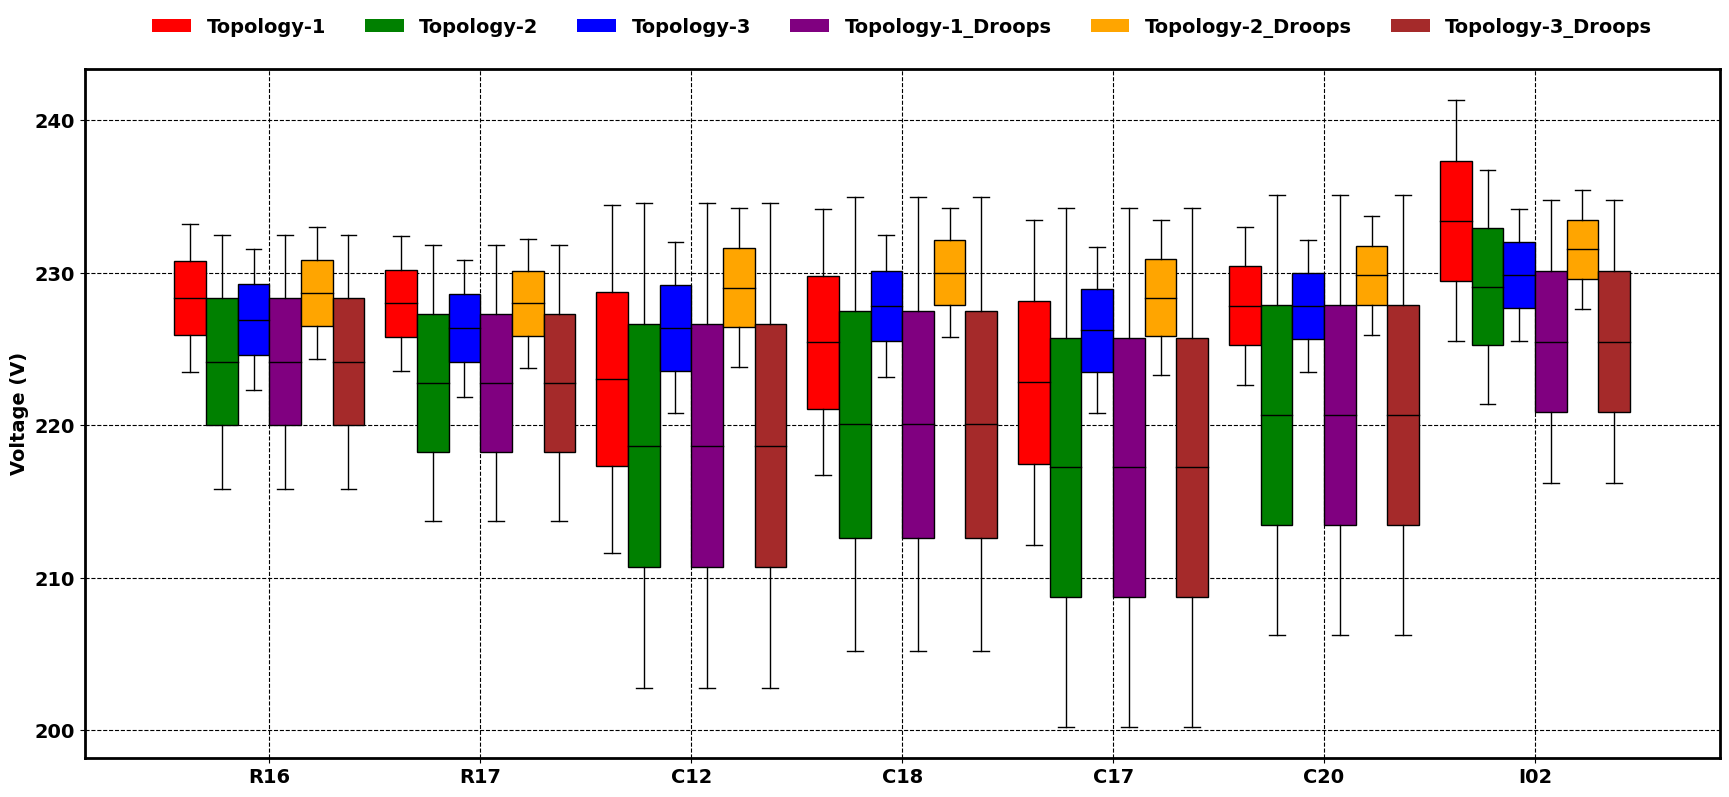

In [1]:
# Voltage in box plot With amd Without Droop in case-3 at Topology-1, 2 and 3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']

topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

topology_data = {}
for topology, filename in topology_files.items():
    topology_data[topology] = {
        'with_droop': read_voltage_data(filename, selected_buses, droop=True),
        'without_droop': read_voltage_data(filename, selected_buses, droop=False)
    }


# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, data in topology_data.items():
        if data['with_droop'] is not None:
            max_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_with = data['with_droop'][data['with_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_with, max_v_with])
        if data['without_droop'] is not None:
            max_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Max Voltage'].iloc[0]
            min_v_without = data['without_droop'][data['without_droop']['Bus'] == bus]['Min Voltage'].iloc[0]
            bus_data[bus].append([min_v_without, max_v_without])


fig, ax = plt.subplots(figsize=(18, 8))
positions = np.arange(len(bus_data))
width = 0.15

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=color)
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=color)
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j % len(topology_colors)])

ax.set_xticks(positions + width * (len(topology_voltages) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_voltages), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

In [ ]:
## End

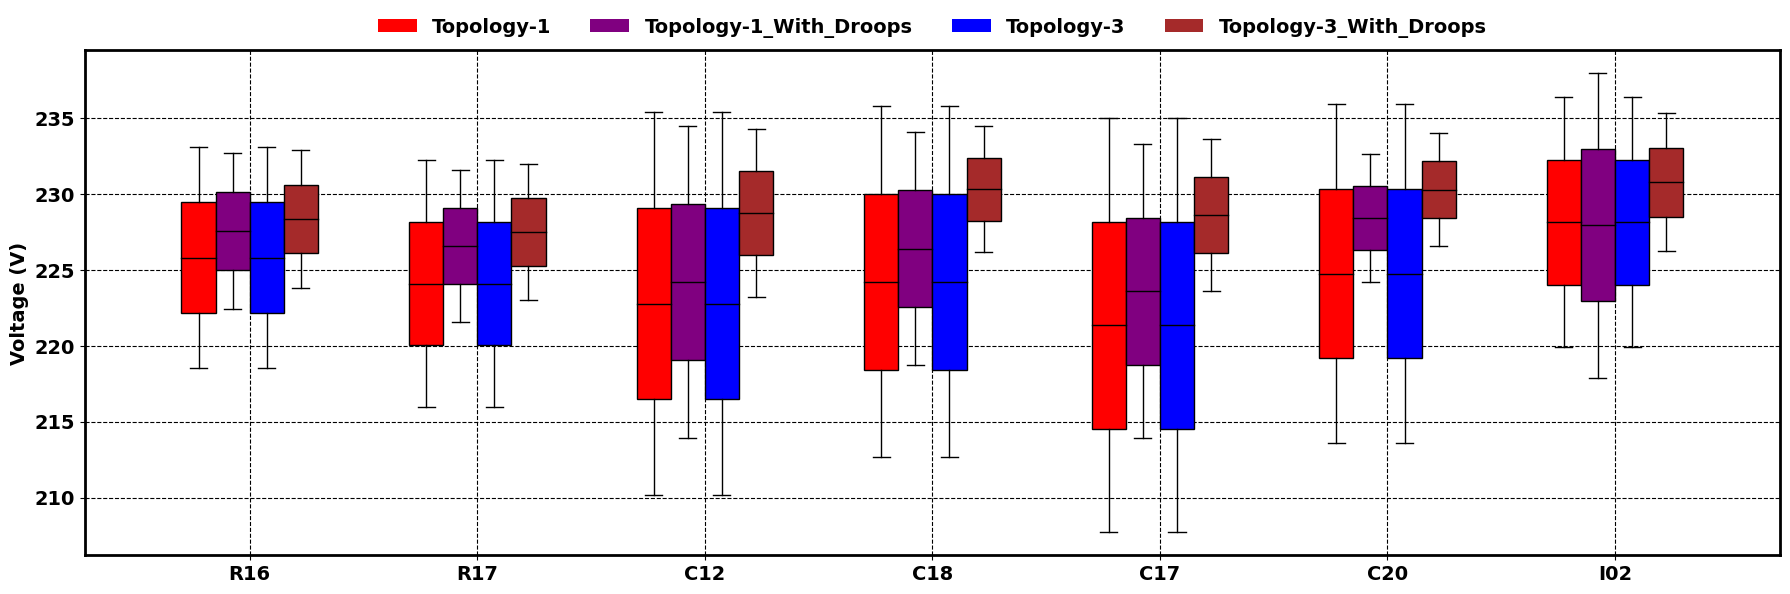

In [8]:
# Voltage in box plot With amd Without Droop in case-1 at Topology-1 and 3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading ---
def read_voltage_data(filename, selected_buses, droop):
    droop_str = "_With_Droops" if droop else "_Without_Droops"
    filename = filename.replace("_With_Droops", droop_str)
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except (pd.errors.EmptyDataError, pd.errors.ParserError, KeyError) as e:
        print(f"Error reading '{filename}': {e}")
        return None

topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case1.csv',  # Changed case to 2
    'Topology-3': 'Voltage_With_Droops_Topology3_case1.csv',  # Changed case to 2
}

selected_buses = ['R16', 'R17','R06', 'R11', 'C08', 'C13', 'C07', 'C15', 'c02', 'I02']

#Corrected legend and color mapping
topology_colors = {
    'Topology-1': 'red',
    'Topology-1_With_Droops': 'purple',
    'Topology-3': 'blue',
    'Topology-3_With_Droops': 'brown',
}

all_data = {}
for topology, filename in topology_files.items():
    # Load data with and without droops
    df_without_droop = read_voltage_data(filename, selected_buses, droop=False)
    df_with_droop = read_voltage_data(filename, selected_buses, droop=True)

    if df_without_droop is not None:
        all_data[topology] = df_without_droop
    if df_with_droop is not None:
        all_data[topology + '_With_Droops'] = df_with_droop

# --- Plotting ---
fig, ax = plt.subplots(figsize=(18, 6))
width = 0.15
positions = np.arange(len(selected_buses))

handles = []
labels = []

for i, bus in enumerate(selected_buses):
    for j, (key, df) in enumerate(all_data.items()):
        if df is not None:
            bus_data = df[df['Bus'] == bus][['Min Voltage', 'Max Voltage']].values.tolist()
            if bus_data: # Check if bus_data is not empty
                bus_data = bus_data[0] #Take the first element if it's a list of lists
                box = ax.boxplot(bus_data, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
                color = topology_colors[key]
                plt.setp(box['boxes'], color='black', facecolor=color)
                plt.setp(box['medians'], color='black', linewidth=1)
                plt.setp(box['caps'], color='black')
                plt.setp(box['whiskers'], color='black')
                plt.setp(box['fliers'], markeredgecolor='black')

                if i == 0:
                    handle = plt.Rectangle((0, 0), 1, 1, fc=color)
                    handles.append(handle)
                    labels.append(key)

ax.set_xticks(positions + width * (len(all_data) - 1) / 2)
ax.set_xticklabels(selected_buses, fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(all_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

# ... (rest of the plotting code remains the same)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

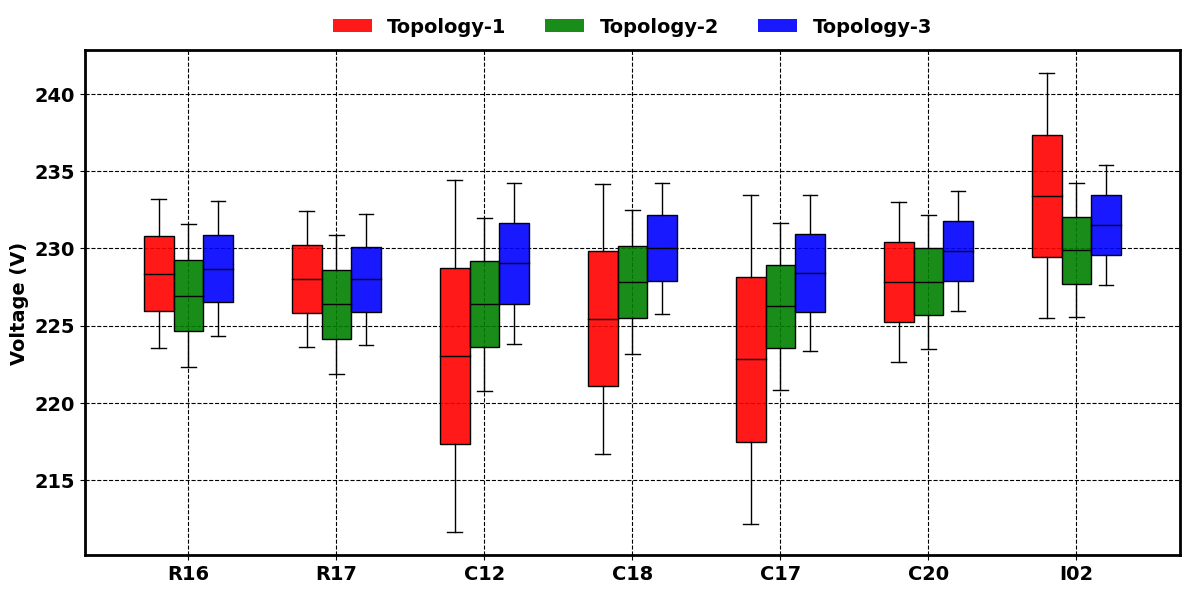

In [4]:
# Voltage in box plot With Droop in case-3 at Topology-1/2/3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_voltage_data(filename, selected_buses):
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]  # Filter for selected buses
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None
    except KeyError:
        print(f"Error: 'Bus' column not found in '{filename}'.")
        return None


topology_files = {
    'Topology-1': 'Voltage_With_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_With_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_With_Droops_Topology3_case3.csv',
}

selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']

topology_colors = {'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue'}

topology_data = {}
for topology, filename in topology_files.items():
    df = read_voltage_data(filename, selected_buses)
    if df is None:
        continue

    topology_data[topology] = df

# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, df in topology_data.items():
        max_v = df[df['Bus'] == bus]['Max Voltage'].iloc[0]
        min_v = df[df['Bus'] == bus]['Min Voltage'].iloc[0]
        bus_data[bus].append([min_v, max_v])


fig, ax = plt.subplots(figsize=(12, 6))
positions = np.arange(len(bus_data))
width = 0.2

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9))
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j])

ax.set_xticks(positions + width * (len(topology_data) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

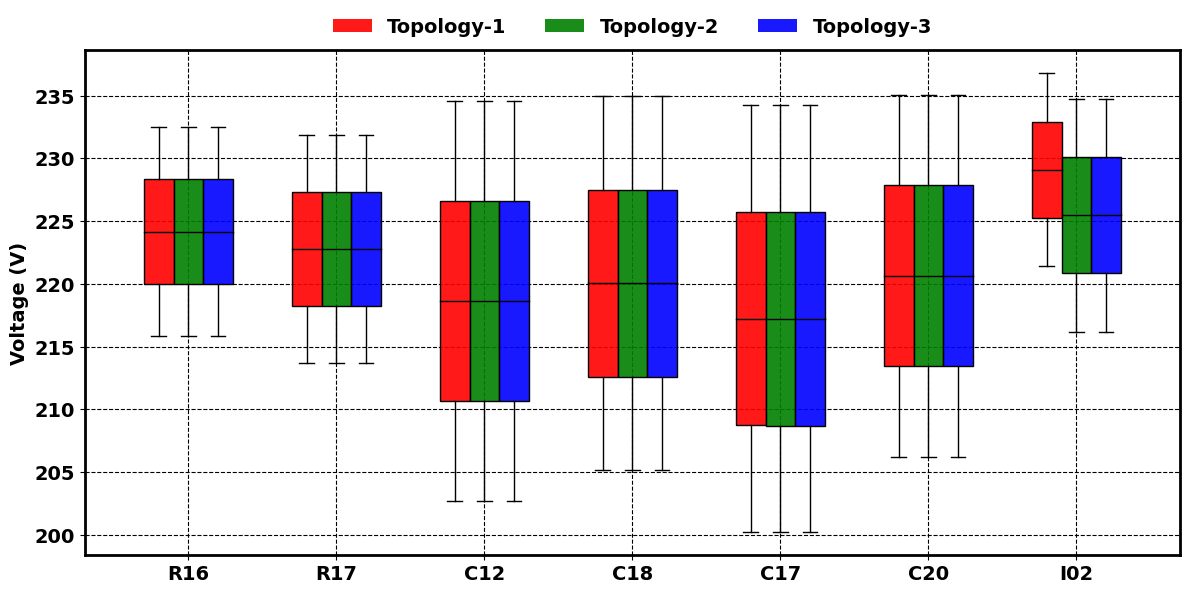

In [2]:
# Voltage in box plot Without Droop in case-3 at Topology-1/2/3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_voltage_data(filename, selected_buses):
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]  # Filter for selected buses
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None
    except KeyError:
        print(f"Error: 'Bus' column not found in '{filename}'.")
        return None


topology_files = {
    'Topology-1': 'Voltage_Without_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_Without_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_Without_Droops_Topology3_case3.csv',
}

selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']

topology_colors = {'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue'}

topology_data = {}
for topology, filename in topology_files.items():
    df = read_voltage_data(filename, selected_buses)
    if df is None:
        continue

    topology_data[topology] = df

# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, df in topology_data.items():
        max_v = df[df['Bus'] == bus]['Max Voltage'].iloc[0]
        min_v = df[df['Bus'] == bus]['Min Voltage'].iloc[0]
        bus_data[bus].append([min_v, max_v])


fig, ax = plt.subplots(figsize=(12, 6))
positions = np.arange(len(bus_data))
width = 0.2

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9))
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j])

ax.set_xticks(positions + width * (len(topology_data) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Voltage in box plot Without Droop in case-3 at Topology-1/2/3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_voltage_data(filename, selected_buses):
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]  # Filter for selected buses
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None
    except KeyError:
        print(f"Error: 'Bus' column not found in '{filename}'.")
        return None


topology_files = {
    'Topology-1': 'Voltage_Without_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_Without_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_Without_Droops_Topology3_case3.csv',
}

selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']

topology_colors = {'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue'}

topology_data = {}
for topology, filename in topology_files.items():
    df = read_voltage_data(filename, selected_buses)
    if df is None:
        continue

    topology_data[topology] = df

# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, df in topology_data.items():
        max_v = df[df['Bus'] == bus]['Max Voltage'].iloc[0]
        min_v = df[df['Bus'] == bus]['Min Voltage'].iloc[0]
        bus_data[bus].append([min_v, max_v])


fig, ax = plt.subplots(figsize=(12, 6))
positions = np.arange(len(bus_data))
width = 0.2

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9))
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j])

ax.set_xticks(positions + width * (len(topology_data) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

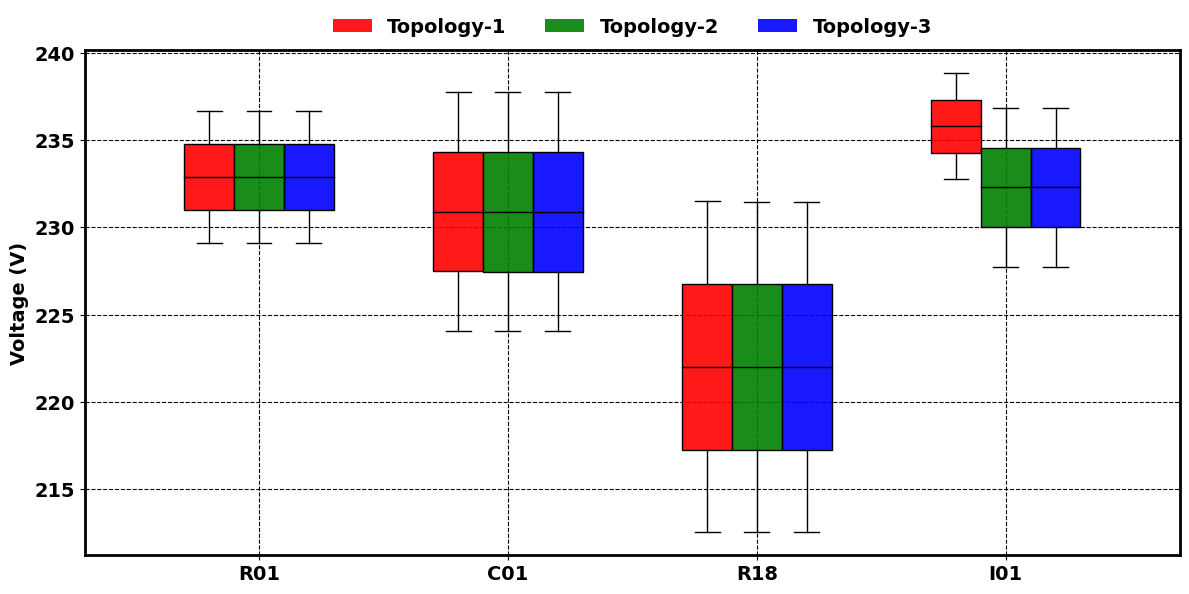

In [1]:
# Voltage in box plot Without Droop in case-3 at Topology-1/2/3 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def read_voltage_data(filename, selected_buses):
    try:
        df = pd.read_csv(filename)
        df = df[df['Bus'].isin(selected_buses)]  # Filter for selected buses
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{filename}' is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse file '{filename}'. Check the file format.")
        return None
    except KeyError:
        print(f"Error: 'Bus' column not found in '{filename}'.")
        return None


topology_files = {
    'Topology-1': 'Voltage_Without_Droops_Topology1_case3.csv',
    'Topology-2': 'Voltage_Without_Droops_Topology2_case3.csv',
    'Topology-3': 'Voltage_Without_Droops_Topology3_case3.csv',
}

selected_buses = ['R01', 'C01', 'R18', 'I01']

topology_colors = {'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue'}

topology_data = {}
for topology, filename in topology_files.items():
    df = read_voltage_data(filename, selected_buses)
    if df is None:
        continue

    topology_data[topology] = df

# Prepare data for boxplot
bus_data = {}
for bus in selected_buses:
    bus_data[bus] = []
    for topology, df in topology_data.items():
        max_v = df[df['Bus'] == bus]['Max Voltage'].iloc[0]
        min_v = df[df['Bus'] == bus]['Min Voltage'].iloc[0]
        bus_data[bus].append([min_v, max_v])


fig, ax = plt.subplots(figsize=(12, 6))
positions = np.arange(len(bus_data))
width = 0.2

handles = []
labels = []

for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, voltages in enumerate(topology_voltages):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True, showfliers=False)
        color = list(topology_colors.values())[j]
        plt.setp(box['boxes'], color='black', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9))
            handles.append(handle)
            labels.append(list(topology_colors.keys())[j])

ax.set_xticks(positions + width * (len(topology_data) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(topology_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

ax.grid(linestyle='--', color='black')
plt.tight_layout()
plt.show()

In [ ]:
# Voltage in box plot Without Droop in case-3 at Topology-2 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Read the voltage data from the CSV file
data = pd.read_csv('Voltage_Without_Droops_Topology2_case3.csv')

# Filter the data for buses R18, I02, and C17
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
bus_data = {bus: data[data['Bus'] == bus][['Max Voltage', 'Min Voltage']].values.flatten() for bus in selected_buses}

# Create a boxplot for the selected buses
plt.figure(figsize=(10, 6))
colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Boxplot parameters
box_width = 0.15
positions = range(1, len(bus_data) + 1)

for i, (bus, voltage_data) in enumerate(bus_data.items()):
    color = colors[bus]
    box = plt.boxplot(voltage_data, positions=[positions[i]], widths=box_width, patch_artist=True, showfliers=False)

    # Set box properties
    plt.setp(box['boxes'], facecolor=color, edgecolor='black')
    plt.setp(box['medians'], color='black', linewidth=2)  # Thicker median line
    plt.setp(box['caps'], color='black')
    plt.setp(box['whiskers'], color='black')

    # Center the median line
    median = np.median(voltage_data)
    plt.plot(positions[i], median, markersize=5, color='black')

#plt.title('Voltage Data Boxplot Without Droop', fontsize=14, fontweight='bold') # No need
plt.xlabel('Bus', fontsize=12, fontweight='bold')
plt.ylabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.xticks(positions, bus_data.keys(), fontsize=12, fontweight='bold')

# Get y-tick values
yticks = plt.gca().get_yticks()

# Format y-ticks to two decimal places
# ytick_labels = [f'{ytick:.2f}' for ytick in yticks] # No need

# Set the y-axis locator and formatter explicitly
plt.gca().yaxis.set_major_locator(ticker.FixedLocator(yticks))
# plt.gca().yaxis.set_major_formatter(ticker.FixedFormatter(ytick_labels)) # No need

# Make y-tick labels bold
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')

plt.grid(axis='y', linestyle='--')  # Add grid for better readability

plt.tight_layout()
plt.show()

In [ ]:
# Voltage in box plot With Droop in case-3 at Topology-2 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Read the voltage data from the CSV file
data = pd.read_csv('Voltage_With_Droops_Topology2_case3.csv')

# Filter the data for buses R18, I02, and C17
selected_buses = ['R16', 'R17', 'C12', 'C18', 'C17', 'C20', 'I02']
bus_data = {bus: data[data['Bus'] == bus][['Max Voltage', 'Min Voltage']].values.flatten() for bus in selected_buses}

# Create a boxplot for the selected buses
plt.figure(figsize=(10, 6))
colors = {
    'R16': 'red',
    'R17': 'blue',
    'C12': 'green',
    'C18': 'yellow',
    'C17': 'orange',
    'C20': 'pink',
    'I02': 'brown'
}

# Boxplot parameters
box_width = 0.15
positions = range(1, len(bus_data) + 1)

for i, (bus, voltage_data) in enumerate(bus_data.items()):
    color = colors[bus]
    box = plt.boxplot(voltage_data, positions=[positions[i]], widths=box_width, patch_artist=True, showfliers=False)

    # Set box properties
    plt.setp(box['boxes'], facecolor=color, edgecolor='black')
    plt.setp(box['medians'], color='black', linewidth=2)  # Thicker median line
    plt.setp(box['caps'], color='black')
    plt.setp(box['whiskers'], color='black')

    # Center the median line
    median = np.median(voltage_data)
    plt.plot(positions[i], median, markersize=5, color='black')

#plt.title('Voltage Data Boxplot Without Droop', fontsize=14, fontweight='bold') # No need
plt.xlabel('Bus', fontsize=12, fontweight='bold')
plt.ylabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.xticks(positions, bus_data.keys(), fontsize=12, fontweight='bold')

# Get y-tick values
yticks = plt.gca().get_yticks()

# Format y-ticks to two decimal places
# ytick_labels = [f'{ytick:.2f}' for ytick in yticks] # No need

# Set the y-axis locator and formatter explicitly
plt.gca().yaxis.set_major_locator(ticker.FixedLocator(yticks))
# plt.gca().yaxis.set_major_formatter(ticker.FixedFormatter(ytick_labels)) # No need

# Make y-tick labels bold
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')

plt.grid(axis='y', linestyle='--')  # Add grid for better readability

plt.tight_layout()
plt.show()

In [ ]:
### End

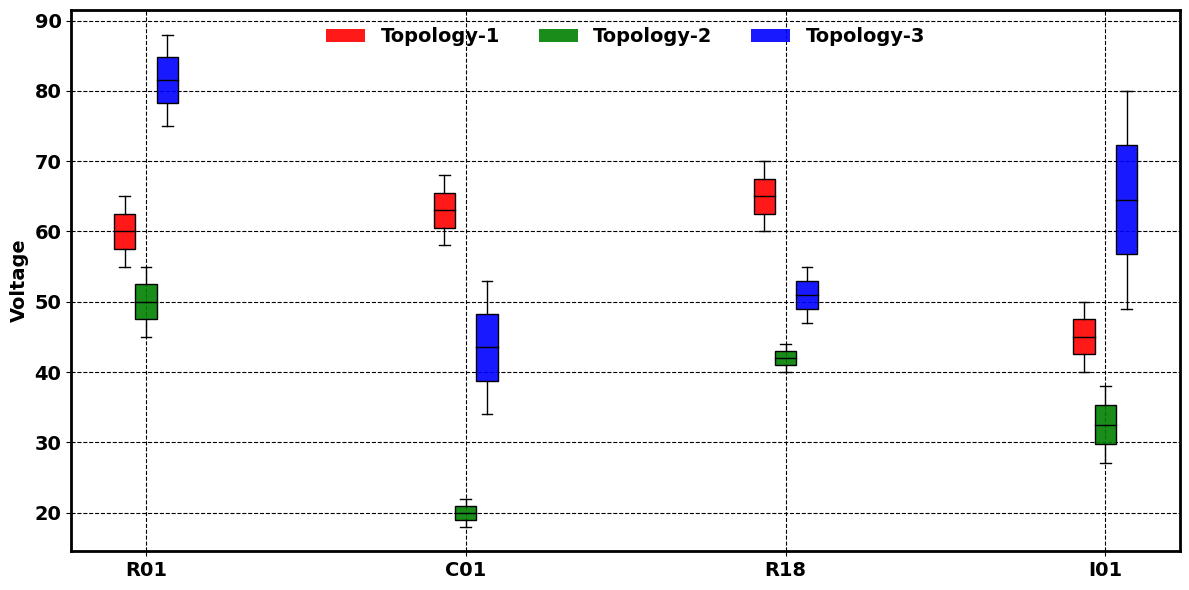

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

topology_data = {
    'Topology-1': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [65, 68, 70, 50],
        'Min Voltage': [55, 58, 60, 40]
    },
    'Topology-2': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 22, 44, 38],
        'Min Voltage': [45, 18, 40, 27]
    },
    'Topology-3': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [88, 53, 55, 80],
        'Min Voltage': [75, 34, 47, 49]
    }
}

# Prepare data for boxplot
bus_data = {}
for topology, data_dict in topology_data.items():
    df = pd.DataFrame(data_dict)
    for index, row in df.iterrows():
        bus = row['Bus']
        max_v = row['Max Voltage']
        min_v = row['Min Voltage']
        if bus not in bus_data:
            bus_data[bus] = {}
        bus_data[bus][topology] = [min_v, max_v]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors and positions for topologies
topology_colors = {'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue'}
positions = np.arange(len(bus_data)) * len(topology_data)
width = 0.2

# Create boxplots
handles = []
labels = []
for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, (topology, voltages) in enumerate(topology_voltages.items()):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True)

        # Set box colors and legend
        color = topology_colors[topology]
        plt.setp(box['boxes'], color='black', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')
        plt.setp(box['fliers'], markeredgecolor='black')

        if i == 0:
            handle = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9))
            handles.append(handle)
            labels.append(topology)

# Set labels, title, and legend with bold fontweight
ax.set_xticks(positions + width * (len(topology_data) - 1) / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
#ax.set_xlabel('Buses', fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(topology_data), frameon=False, prop={'size': 14, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14) # Increase y-axis tick label size
# Make y-axis tick labels bold
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')


ax.grid(linestyle='--', color='black')

plt.tight_layout()
plt.show()

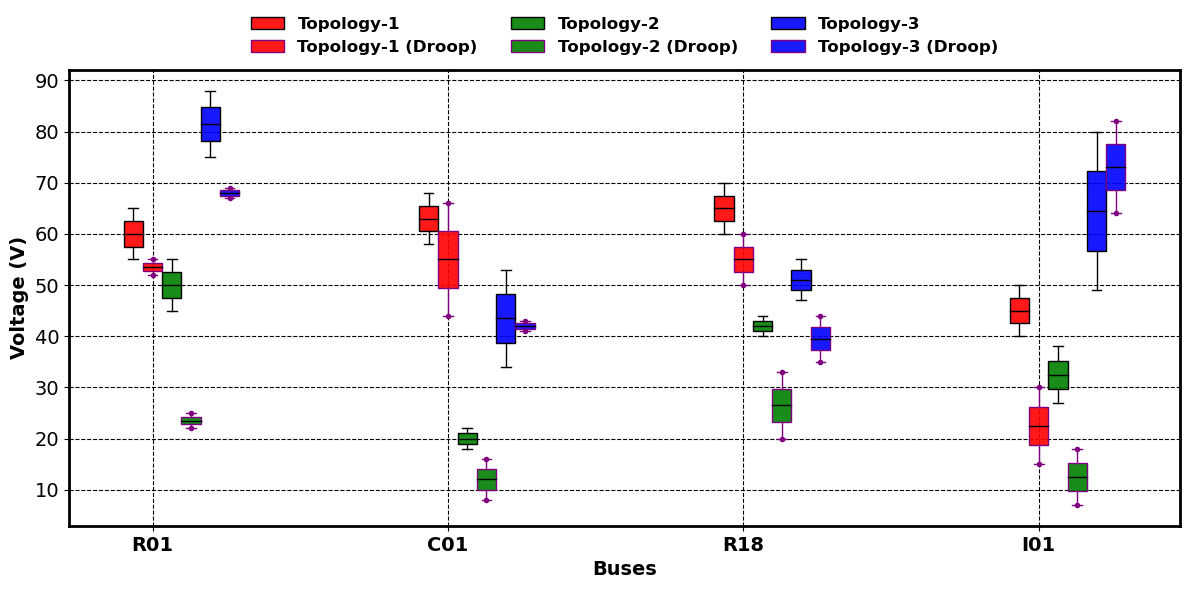

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

topology_data_with_without_Droops = {
    'Topology-1': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [65, 68, 70, 50],
        'Min Voltage': [55, 58, 60, 40]
    },
    'Topology-1_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 66, 60, 30],
        'Min Voltage': [52, 44, 50, 15]
    },
    'Topology-2': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 22, 44, 38],
        'Min Voltage': [45, 18, 40, 27]
    },
    'Topology-2_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [25, 16, 33, 18],
        'Min Voltage': [22, 8, 20, 7]
    },
    'Topology-3': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [88, 53, 55, 80],
        'Min Voltage': [75, 34, 47, 49]
    },
    'Topology-3_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [69, 43, 44, 82],
        'Min Voltage': [67, 41, 35, 64]
    }
}

# Prepare data for boxplot
bus_data = {}
for topology, data_dict in topology_data_with_without_Droops.items():
    df = pd.DataFrame(data_dict)
    for index, row in df.iterrows():
        bus = row['Bus']
        max_v = row['Max Voltage']
        min_v = row['Min Voltage']
        if bus not in bus_data:
            bus_data[bus] = {}
        bus_data[bus][topology] = [min_v, max_v]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors and positions for topologies
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}
num_buses = len(bus_data)
num_topologies = 2
box_width = 0.15
group_spacing = 2 #Increased spacing for better visualization
positions = np.arange(num_buses) * (num_topologies * box_width + group_spacing)

# Create boxplots
handles = []
labels = []
for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, (topology, voltages) in enumerate(topology_voltages.items()):
        box = ax.boxplot(voltages, positions=[positions[i] + j * box_width], widths=box_width, patch_artist=True, showfliers=False)

        color = topology_colors[topology.replace('_Droops', '')]
        plt.setp(box['boxes'], color='black' if '_Droops' not in topology else 'purple', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black' if '_Droops' not in topology else 'purple')
        plt.setp(box['whiskers'], color='black' if '_Droops' not in topology else 'purple')
        plt.setp(box['fliers'], markeredgecolor='black')

        if '_Droops' in topology:
            for k in range(len(voltages)):
                ax.plot(positions[i] + j * box_width, voltages[k], marker='o', markersize=3, color='purple', linestyle='')

        if i == 0:
            patch = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9), ec='purple' if '_Droops' in topology else 'black')
            handles.append(patch)
            labels.append(topology.replace('_Droops', ' (Droop)') if '_Droops' in topology else topology)


# Set labels, title, and legend with bold fontweight
ax.set_xticks(positions + box_width)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_xlabel('Buses', fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 12, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='black')

plt.tight_layout()
plt.show()

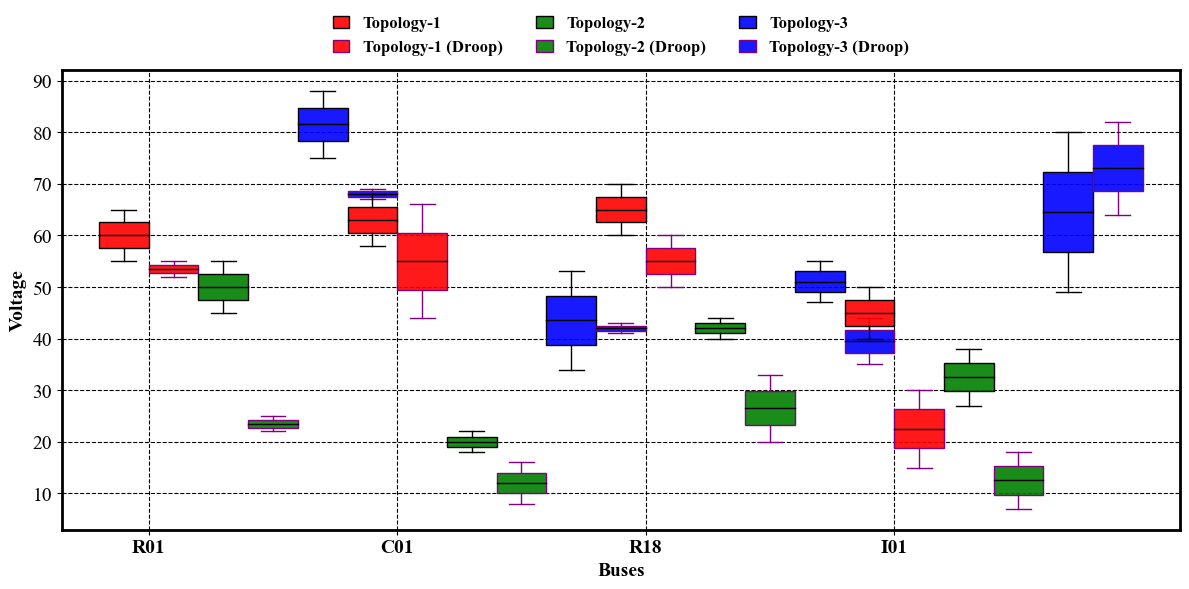

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

topology_data_with_without_Droops = {
    'Topology-1': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [65, 68, 70, 50],
        'Min Voltage': [55, 58, 60, 40]
    },
    'Topology-1_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 66, 60, 30],
        'Min Voltage': [52, 44, 50, 15]
    },
    'Topology-2': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 22, 44, 38],
        'Min Voltage': [45, 18, 40, 27]
    },
    'Topology-2_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [25, 16, 33, 18],
        'Min Voltage': [22, 8, 20, 7]
    },
    'Topology-3': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [88, 53, 55, 80],
        'Min Voltage': [75, 34, 47, 49]
    },
    'Topology-3_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [69, 43, 44, 82],
        'Min Voltage': [67, 41, 35, 64]
    }
}

# Prepare data for boxplot
bus_data = {}
for topology, data_dict in topology_data_with_without_Droops.items():
    df = pd.DataFrame(data_dict)
    for index, row in df.iterrows():
        bus = row['Bus']
        max_v = row['Max Voltage']
        min_v = row['Min Voltage']
        if bus not in bus_data:
            bus_data[bus] = {}
        bus_data[bus][topology] = [min_v, max_v]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors and positions for topologies
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}
positions = np.arange(len(bus_data)) * 2
width = 0.4

# Create boxplots
handles = []
labels = []
for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, (topology, voltages) in enumerate(topology_voltages.items()):
        box = ax.boxplot(voltages, positions=[positions[i] + j * width], widths=width, patch_artist=True)

        color = topology_colors[topology]
        plt.setp(box['boxes'], color='black' if '_Droops' not in topology else 'purple', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9)) # Purple outline for droop
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black' if '_Droops' not in topology else 'purple') # Purple caps for droop
        plt.setp(box['whiskers'], color='black' if '_Droops' not in topology else 'purple') # Purple whiskers for droop
        plt.setp(box['fliers'], markeredgecolor='black')

        # Add markers inside the boxplot for droop topologies
        if '_Droops' in topology:
            for k in range(len(voltages)):
                ax.plot(positions[i] + j * width, voltages[k], markersize=8, color='purple', linestyle='') # Changed marker to '*'


        if i == 0:
            patch = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9), ec='purple' if '_Droops' in topology else 'black') #Purple edge for droop in legend
            handles.append(patch)
            labels.append(topology.replace('_Droops', ' (Droop)') if '_Droops' in topology else topology)


# Set labels, title, and legend with bold fontweight
ax.set_xticks(positions + width / 2)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_xlabel('Buses', fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 12, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='black')

plt.tight_layout()
plt.show()

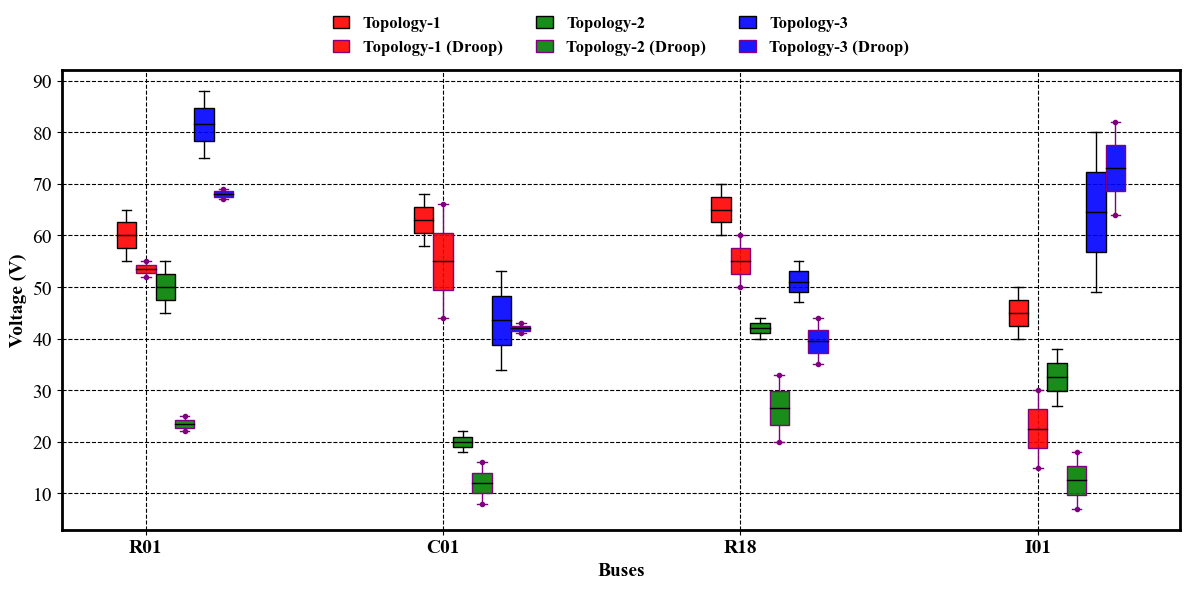

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

topology_data_with_without_Droops = {
    'Topology-1': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [65, 68, 70, 50],
        'Min Voltage': [55, 58, 60, 40]
    },
    'Topology-1_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 66, 60, 30],
        'Min Voltage': [52, 44, 50, 15]
    },
    'Topology-2': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 22, 44, 38],
        'Min Voltage': [45, 18, 40, 27]
    },
    'Topology-2_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [25, 16, 33, 18],
        'Min Voltage': [22, 8, 20, 7]
    },
    'Topology-3': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [88, 53, 55, 80],
        'Min Voltage': [75, 34, 47, 49]
    },
    'Topology-3_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [69, 43, 44, 82],
        'Min Voltage': [67, 41, 35, 64]
    }
}

# Prepare data for boxplot
bus_data = {}
for topology, data_dict in topology_data_with_without_Droops.items():
    df = pd.DataFrame(data_dict)
    for index, row in df.iterrows():
        bus = row['Bus']
        max_v = row['Max Voltage']
        min_v = row['Min Voltage']
        if bus not in bus_data:
            bus_data[bus] = {}
        bus_data[bus][topology] = [min_v, max_v]

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors and positions for topologies
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'red', 'Topology-2_Droops': 'green', 'Topology-3_Droops': 'blue'
}
num_buses = len(bus_data)
num_topologies = 2
box_width = 0.15
group_spacing = 2 #Increased spacing for better visualization
positions = np.arange(num_buses) * (num_topologies * box_width + group_spacing)

# Create boxplots
handles = []
labels = []
for i, (bus, topology_voltages) in enumerate(bus_data.items()):
    for j, (topology, voltages) in enumerate(topology_voltages.items()):
        box = ax.boxplot(voltages, positions=[positions[i] + j * box_width], widths=box_width, patch_artist=True, showfliers=False)

        color = topology_colors[topology.replace('_Droops', '')]
        plt.setp(box['boxes'], color='black' if '_Droops' not in topology else 'purple', facecolor=plt.cm.colors.to_rgba(color, alpha=0.9))
        plt.setp(box['medians'], color='black', linewidth=1)
        plt.setp(box['caps'], color='black' if '_Droops' not in topology else 'purple')
        plt.setp(box['whiskers'], color='black' if '_Droops' not in topology else 'purple')
        plt.setp(box['fliers'], markeredgecolor='black')

        if '_Droops' in topology:
            for k in range(len(voltages)):
                ax.plot(positions[i] + j * box_width, voltages[k], marker='o', markersize=3, color='purple', linestyle='')

        if i == 0:
            patch = plt.Rectangle((0, 0), 1, 1, fc=plt.cm.colors.to_rgba(color, alpha=0.9), ec='purple' if '_Droops' in topology else 'black')
            handles.append(patch)
            labels.append(topology.replace('_Droops', ' (Droop)') if '_Droops' in topology else topology)


# Set labels, title, and legend with bold fontweight
ax.set_xticks(positions + box_width)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=14)
ax.set_xlabel('Buses', fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 12, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='black')

plt.tight_layout()
plt.show()

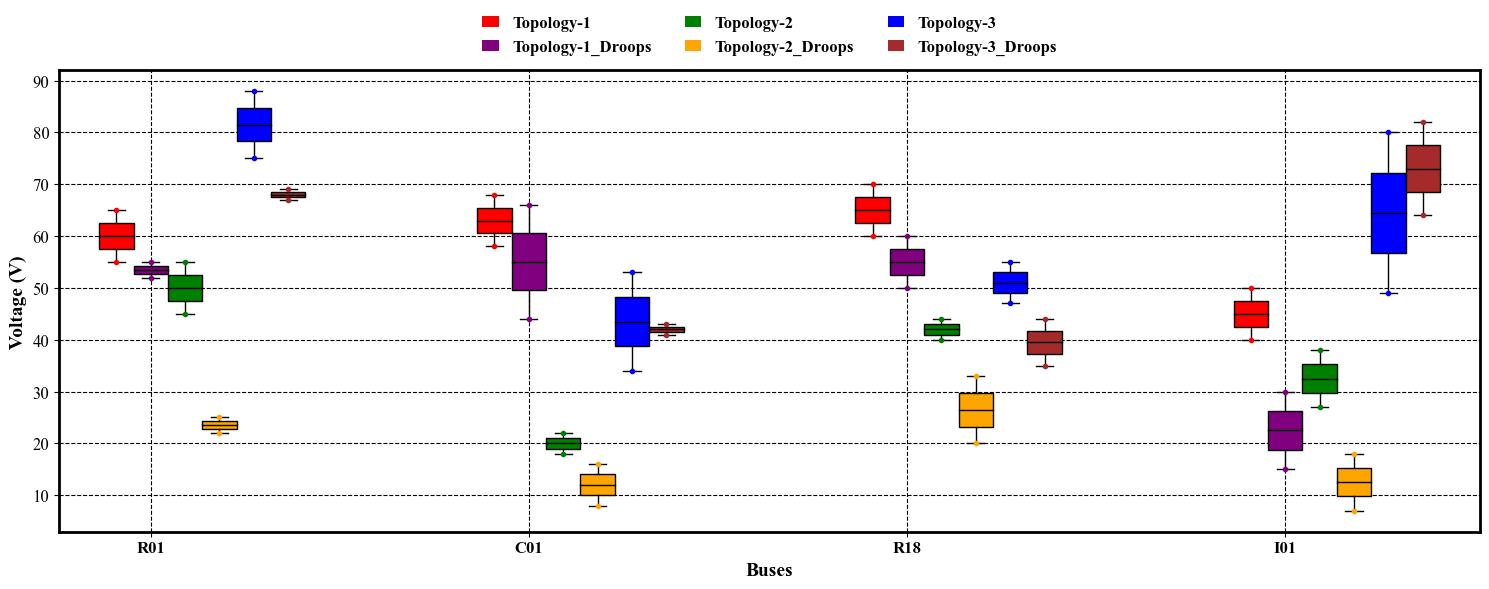

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

topology_data = {
    'Topology-1': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [65, 68, 70, 50],
        'Min Voltage': [55, 58, 60, 40]
    },
    'Topology-1_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 66, 60, 30],
        'Min Voltage': [52, 44, 50, 15]
    },
    'Topology-2': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [55, 22, 44, 38],
        'Min Voltage': [45, 18, 40, 27]
    },
    'Topology-2_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [25, 16, 33, 18],
        'Min Voltage': [22, 8, 20, 7]
    },
    'Topology-3': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [88, 53, 55, 80],
        'Min Voltage': [75, 34, 47, 49]
    },
    'Topology-3_Droops': {
        'Bus': ['R01', 'C01', 'R18', 'I01'],
        'Max Voltage': [69, 43, 44, 82],
        'Min Voltage': [67, 41, 35, 64]
    }
}

# Prepare data for boxplot
bus_data = {}
for topology, data_dict in topology_data.items():
    df = pd.DataFrame(data_dict)
    for index, row in df.iterrows():
        bus = row['Bus']
        max_v = row['Max Voltage']
        min_v = row['Min Voltage']
        if bus not in bus_data:
            bus_data[bus] = {}
        bus_data[bus][topology] = [min_v, max_v]


# Define colors for topologies
topology_colors = {
    'Topology-1': 'red', 'Topology-2': 'green', 'Topology-3': 'blue',
    'Topology-1_Droops': 'purple', 'Topology-2_Droops': 'orange', 'Topology-3_Droops': 'brown'
}

# Plotting parameters
num_buses = len(bus_data)
box_width = 0.3
group_spacing = 1.5
positions = np.arange(num_buses) * (len(topology_colors) * box_width + group_spacing)

fig, ax = plt.subplots(figsize=(15, 6))

handles = []
labels = []

for i, (bus, topologies) in enumerate(bus_data.items()):
    for j, (topology, voltages) in enumerate(topologies.items()):
        pos = positions[i] + j * box_width
        box = ax.boxplot(voltages, positions=[pos], widths=box_width, patch_artist=True, showfliers=False)

        color = topology_colors[topology]
        plt.setp(box['boxes'], facecolor=color, edgecolor='black')
        plt.setp(box['medians'], color='black')
        plt.setp(box['caps'], color='black')
        plt.setp(box['whiskers'], color='black')

        # Add individual data points
        for k in range(len(voltages)):
            ax.plot(pos, voltages[k], marker='o', markersize=3, color=color, linestyle='')

        if i == 0: # Add legend entries only once per topology
            patch = plt.Rectangle((0, 0), 1, 1, fc=color)
            handles.append(patch)
            labels.append(topology)


ax.set_xticks(positions + box_width)
ax.set_xticklabels(bus_data.keys(), fontweight='bold', fontsize=12)
ax.set_xlabel('Buses', fontweight='bold', fontsize=14)
ax.set_ylabel('Voltage (V)', fontweight='bold', fontsize=14)
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, prop={'size': 12, 'weight': 'bold'})

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(axis='y', labelsize=12)
ax.grid(linestyle='--', color='black')

plt.tight_layout()
plt.show()

In [29]:
i_R01_a = np.abs(model.get_value('i_load_R01_a_r') + 1j*model.get_value('i_load_R01_a_i'))
print(i_R01_a)

181.0423607834883
